In [1]:
#load the Mnist data from Keras
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [2]:
x_test.shape

(10000, 28, 28)

5


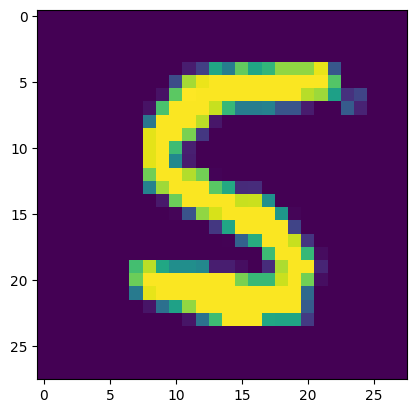

In [3]:
import matplotlib.pyplot as plt
image_index = 59676
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='viridis') #to show the image associated with label

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
#Compiling and fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8678 - loss: 0.4389 
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9618 - loss: 0.1276
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9749 - loss: 0.0821
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9802 - loss: 0.0636
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9838 - loss: 0.0523
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9850 - loss: 0.0472
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9869 - loss: 0.0385
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9877 - loss: 0.0344
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9892 - loss: 0.0321
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9899 - loss: 0.0280
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9907 - loss: 0.0268
Epoch 12/20

In [7]:
#evaluating
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9818 - loss: 0.0878


[0.0683312937617302, 0.986299991607666]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
3


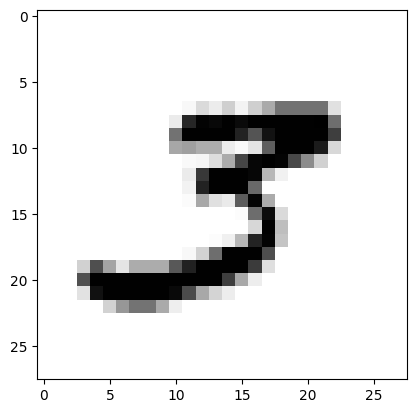

In [8]:
#testing on test data
image_index = 7248 #choose random value up to 10000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

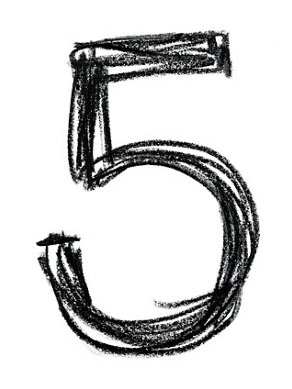

In [9]:
#Previewing the downloaded image 
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
im = cv2.imread("num 5.jpg")
# Show image
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [10]:
im.shape

(403, 297, 3)

In [11]:
from tensorflow.keras.preprocessing import image
#load downloaded image and resze to target size
img = image.load_img("num 5.jpg", target_size=(28, 28),color_mode="grayscale")

In [12]:
#convert loaded and resized image to array of numbers
img_array = image.img_to_array(img)

In [13]:
#Confirm new shape
img_array.shape

(28, 28, 1)

In [14]:
#Convert image array to 2D format that can be predicted upon
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

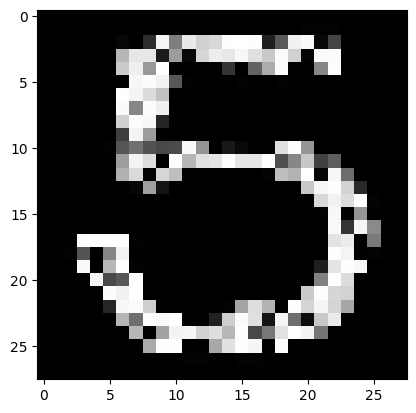

In [15]:
plt.imshow(img_array,cmap="Greys")

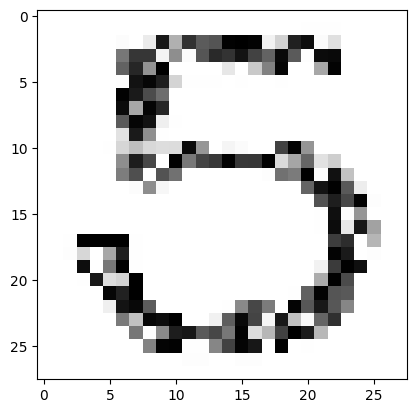

In [16]:
#invert loaded image array into same format as data used for training
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
5


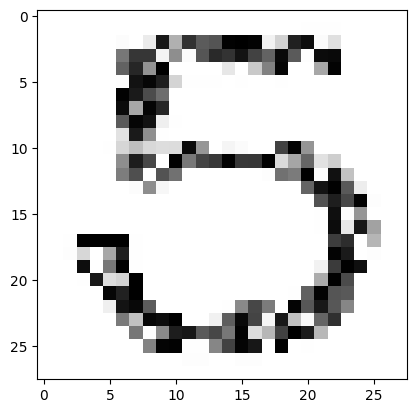

In [17]:
#Running Prediction on the image

plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())